In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [2]:
data = pd.read_csv(r'train.csv', header=None)
testData = pd.read_csv(r'predict.csv', header=None)

X = data[0].to_numpy()
y = data[1].to_numpy()
test = testData[0].to_numpy()
test1 = test1 = np.array([0.1, 0.65, 0.39, 0.56, 0.72, 0.22])

#About the dataset:
#Values of x are generated between from 0 to 2.5 with linear space of 0.1
#values of y are the error added to x as standard normal cumulative probability
#X is feature, y is target

#What's the optimal smoothing parameters and what is smoothing parameter
#test data, then see if its not over fitting

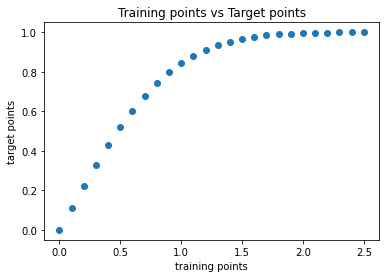

In [3]:
#correlation between x and y
plt.scatter(X,y,cmap='viridis')
#plt.colorbar()
plt.title("Training points vs Target points")
plt.xlabel("training points")
plt.ylabel("target points")
plt.show()

In [4]:
#Let's start

class GRNN(object):
    def __init__(self, X):
        self.X = X #train
        self.y = []
        for i in range(len(self.X)):
            self.y.append(math.erf(self.X[i])) #target
        self.y = np.array(self.y)
    
    def calcDist(self, i):
        I = np.abs(self.X - self.X[i]) # Euclidean Distance
        return I
        
    def activate(self, i, sigma):
        f_of_i = np.exp(-self.calcDist(i)/(2*np.power(sigma, 2))) #Activation function
        return f_of_i
    
    def predict(self, sigma):
        ones = np.ones((1, len(self.y)))
        result = []
        for i in range(len(self.y)):
            A = np.dot(self.y, self.activate(i, sigma)) #A
            B = np.dot(ones, self.activate(i, sigma)) #B
            result.append(A/B)
        result = np.array(result)
        return result
        

In [5]:
g = GRNN(X)
sigma = [0.005, 0.05, 0.5, 1]
predict = [] 
for i in range(len(sigma)):
    predict.append(g.predict(sigma[i]))
    
predict = np.array(predict)

In [6]:
rsme = []
for i in range(len(sigma)):
    error = ((predict[i]-y)**2)/len(y)
    error = np.sqrt(error)
    rsme.append(error)
rsme = np.array(rsme)
rsme.shape

(4, 26, 26)

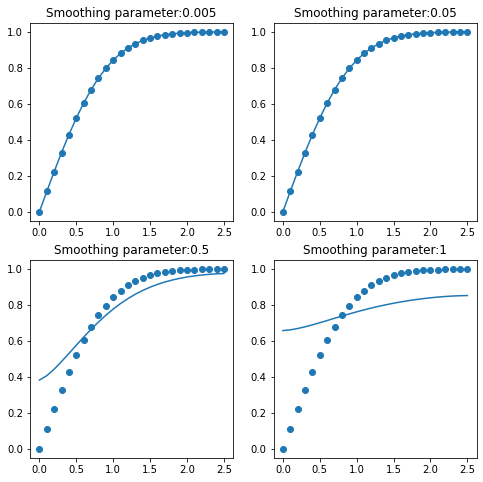

In [7]:
plt.subplots(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.scatter(X, y)
plt.plot(X, predict[0])
plt.title("Smoothing parameter:0.005")

plt.subplot(2, 2, 2)
plt.scatter(X, y)
plt.plot(X, predict[1])
plt.title("Smoothing parameter:0.05")

plt.subplot(2, 2, 3)
plt.scatter(X, y)
plt.plot(X, predict[2])
plt.title("Smoothing parameter:0.5")

plt.subplot(2, 2, 4)
plt.scatter(X, y)
plt.plot(X, predict[3])
plt.title("Smoothing parameter:1")

plt.show()

In [8]:
sigma1 = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
predict = [] 
for i in range(len(sigma1)):
    predict.append(g.predict(sigma1[i]))
predict = np.array(predict)

In [9]:
rsme = []
for i in range(len(sigma1)):
    error = ((predict[i]-y)**2)/len(y)
    error = np.sqrt(error)
    rsme.append(error)
rsme = np.array(rsme)
#rsme

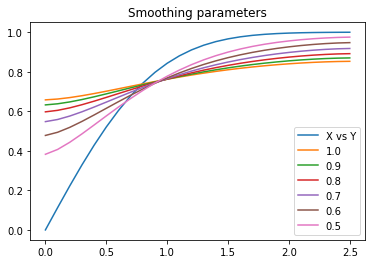

In [10]:
plt.plot(X, y)
plt.plot(X, predict[0])
plt.plot(X, predict[1])
plt.plot(X, predict[2])
plt.plot(X, predict[3])
plt.plot(X, predict[4])
plt.plot(X, predict[5])
plt.title("Smoothing parameters")
labels = ["X vs Y","1.0", "0.9", "0.8", "0.7", "0.6", "0.5"]
plt.legend(labels)

plt.show()

In [11]:
sigma2 = [0.1, 0.2, 0.3, 0.4, 0.5]
predict = [] 
for i in range(len(sigma2)):
    predict.append(g.predict(sigma2[i]))
predict = np.array(predict)

In [12]:
rsme = []
for i in range(len(sigma2)):
    error = ((predict[i]-y)**2)/len(y)
    error = np.sqrt(error)
    rsme.append(error)
rsme = np.array(rsme)
#rsme

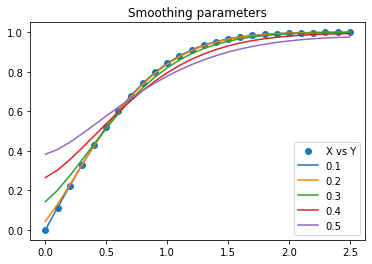

In [13]:
plt.scatter(X, y)
plt.plot(X, predict[0])
plt.plot(X, predict[1])
plt.plot(X, predict[2])
plt.plot(X, predict[3])
plt.plot(X, predict[4])
plt.title("Smoothing parameters")
labels = ["X vs Y","0.1", "0.2", "0.3", "0.4", "0.5"]
plt.legend(labels)

plt.show()

In [14]:
g1 = GRNN(test)
predict1 = [] 
for i in range(len(sigma)):
    predict1.append(g1.predict(sigma[i]))
    
predict1 = np.array(predict1)

In [15]:
rsme = []
for i in range(len(sigma)):
    error = ((predict1[i]-g1.y)**2)/len(g1.y)
    error = np.sqrt(error)
    rsme.append(error)
rsme = np.array(rsme)
np.round(rsme, 2)
rsme[0]

array([[0.        , 0.0921088 , 0.17349996, 0.23705188, 0.28090026,
        0.30763338, 0.32203505, 0.32889056, 0.33177409],
       [0.0921088 , 0.        , 0.08139116, 0.14494308, 0.18879147,
        0.21552458, 0.22992625, 0.23678176, 0.23966529],
       [0.17349996, 0.08139116, 0.        , 0.06355192, 0.10740031,
        0.13413342, 0.14853509, 0.1553906 , 0.15827413],
       [0.23705188, 0.14494308, 0.06355192, 0.        , 0.04384839,
        0.0705815 , 0.08498317, 0.09183868, 0.09472221],
       [0.28090026, 0.18879147, 0.10740031, 0.04384839, 0.        ,
        0.02673311, 0.04113478, 0.04799029, 0.05087382],
       [0.30763338, 0.21552458, 0.13413342, 0.0705815 , 0.02673311,
        0.        , 0.01440167, 0.02125718, 0.02414071],
       [0.32203505, 0.22992625, 0.14853509, 0.08498317, 0.04113478,
        0.01440167, 0.        , 0.00685551, 0.00973904],
       [0.32889056, 0.23678176, 0.1553906 , 0.09183868, 0.04799029,
        0.02125718, 0.00685551, 0.        , 0.00288353],


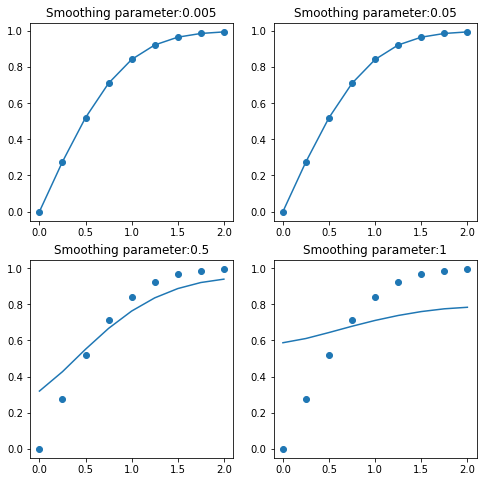

In [16]:
plt.subplots(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.scatter(test, g1.y)
plt.plot(test, predict1[0])
plt.title("Smoothing parameter:0.005")

plt.subplot(2, 2, 2)
plt.scatter(test, g1.y)
plt.plot(test, predict1[1])
plt.title("Smoothing parameter:0.05")

plt.subplot(2, 2, 3)
plt.scatter(test, g1.y)
plt.plot(test, predict1[2])
plt.title("Smoothing parameter:0.5")

plt.subplot(2, 2, 4)
plt.scatter(test, g1.y)
plt.plot(test, predict1[3])
plt.title("Smoothing parameter:1")

plt.show()

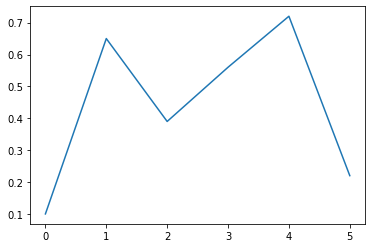

In [17]:
plt.plot(test1)

In [18]:
test1

array([0.1 , 0.65, 0.39, 0.56, 0.72, 0.22])

In [19]:
g1 = GRNN(test1)
predict1 = [] 
for i in range(len(sigma)):
    predict1.append(g1.predict(sigma[i]))
    
predict1 = np.array(predict1)

In [20]:
rsme = []
for i in range(len(sigma)):
    error = ((predict1[i]-g1.y)**2)/len(g1.y)
    error = np.sqrt(error)
    rsme.append(error)
rsme = np.array(rsme)
np.round(rsme, 2)

array([[[0.  , 0.22, 0.13, 0.19, 0.24, 0.05],
        [0.22, 0.  , 0.09, 0.03, 0.02, 0.16],
        [0.13, 0.09, 0.  , 0.06, 0.11, 0.07],
        [0.19, 0.03, 0.06, 0.  , 0.05, 0.13],
        [0.24, 0.02, 0.11, 0.05, 0.  , 0.18],
        [0.05, 0.16, 0.07, 0.13, 0.18, 0.  ]],

       [[0.  , 0.22, 0.13, 0.19, 0.24, 0.05],
        [0.22, 0.  , 0.09, 0.03, 0.02, 0.16],
        [0.13, 0.09, 0.  , 0.06, 0.11, 0.07],
        [0.19, 0.03, 0.06, 0.  , 0.05, 0.13],
        [0.24, 0.02, 0.11, 0.05, 0.  , 0.18],
        [0.05, 0.16, 0.07, 0.13, 0.18, 0.  ]],

       [[0.1 , 0.12, 0.03, 0.09, 0.14, 0.04],
        [0.17, 0.05, 0.04, 0.02, 0.07, 0.11],
        [0.13, 0.08, 0.01, 0.05, 0.1 , 0.08],
        [0.16, 0.06, 0.03, 0.03, 0.08, 0.1 ],
        [0.17, 0.05, 0.05, 0.02, 0.07, 0.12],
        [0.11, 0.11, 0.02, 0.08, 0.13, 0.06]],

       [[0.13, 0.09, 0.  , 0.06, 0.11, 0.07],
        [0.14, 0.07, 0.02, 0.04, 0.09, 0.09],
        [0.14, 0.08, 0.01, 0.05, 0.1 , 0.08],
        [0.14, 0.07, 0.02, 0

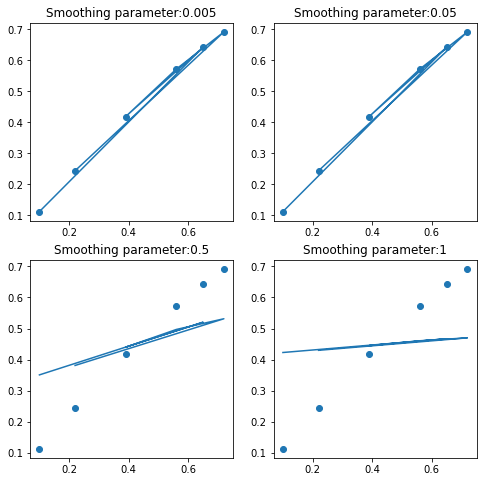

In [21]:
plt.subplots(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.scatter(test1, g1.y)
plt.plot(test1, predict1[0])
plt.title("Smoothing parameter:0.005")

plt.subplot(2, 2, 2)
plt.scatter(test1, g1.y)
plt.plot(test1, predict1[1])
plt.title("Smoothing parameter:0.05")

plt.subplot(2, 2, 3)
plt.scatter(test1, g1.y)
plt.plot(test1, predict1[2])
plt.title("Smoothing parameter:0.5")

plt.subplot(2, 2, 4)
plt.scatter(test1, g1.y)
plt.plot(test1, predict1[3])
plt.title("Smoothing parameter:1")

plt.show()